In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

# LOADING OF DATABASE

In [93]:
#creating database connection
conn = sqlite3.connect('inventory.db')

#fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,59919,1574072.13,9478.0,341113.22,64242.15,17414.40,68601.68,-1232958.91,-361.451517,0.158180,5.692906
1,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,94753,1532156.01,20114.0,442347.86,42886.50,36957.99,257032.07,-1089808.15,-246.369034,0.212278,4.668431
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,61388,1423587.72,9203.0,275162.97,52289.50,16909.12,144929.24,-1148424.75,-417.361664,0.149915,4.482358
3,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,75029,1368528.96,10964.0,282398.36,46667.90,20144.60,123780.22,-1086130.60,-384.609387,0.146130,3.763856
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,57944,1268394.16,11883.0,357759.17,52774.51,21833.58,257032.07,-910634.99,-254.538546,0.205077,6.174223


# **Exploratory Data Analysis**

Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [94]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8503.0,1.012780e+04,17663.278743,2.00,3664.000000,7153.000000,9552.000000,1.733570e+05
Brand,8503.0,1.759251e+04,13002.506160,58.00,5295.500000,17432.000000,24982.500000,9.063100e+04
PurchasePrice,8503.0,2.189845e+01,105.884530,0.36,6.800000,10.270000,18.245000,5.681810e+03
ActualPrice,8503.0,3.220028e+01,144.284353,0.49,10.990000,15.990000,26.990000,7.499990e+03
Volume,8503.0,8.549867e+02,618.300037,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,8503.0,1.672260e+03,5444.265284,1.00,24.000000,229.000000,1177.500000,1.593960e+05
TotalPurchaseDollars,8503.0,1.559235e+04,56216.842154,0.71,344.640000,2806.200000,12386.850000,1.574072e+06
TotalSalesQuantity,8503.0,2.847676e+02,959.709116,0.00,3.000000,34.000000,198.000000,2.790500e+04
TotalSalesDollars,8503.0,3.843601e+03,13465.240926,0.00,59.865000,649.350000,3086.910000,4.423479e+05
TotalSalesPrice,8503.0,1.874260e+03,4258.199371,0.00,22.625000,362.250000,1820.785000,6.424215e+04


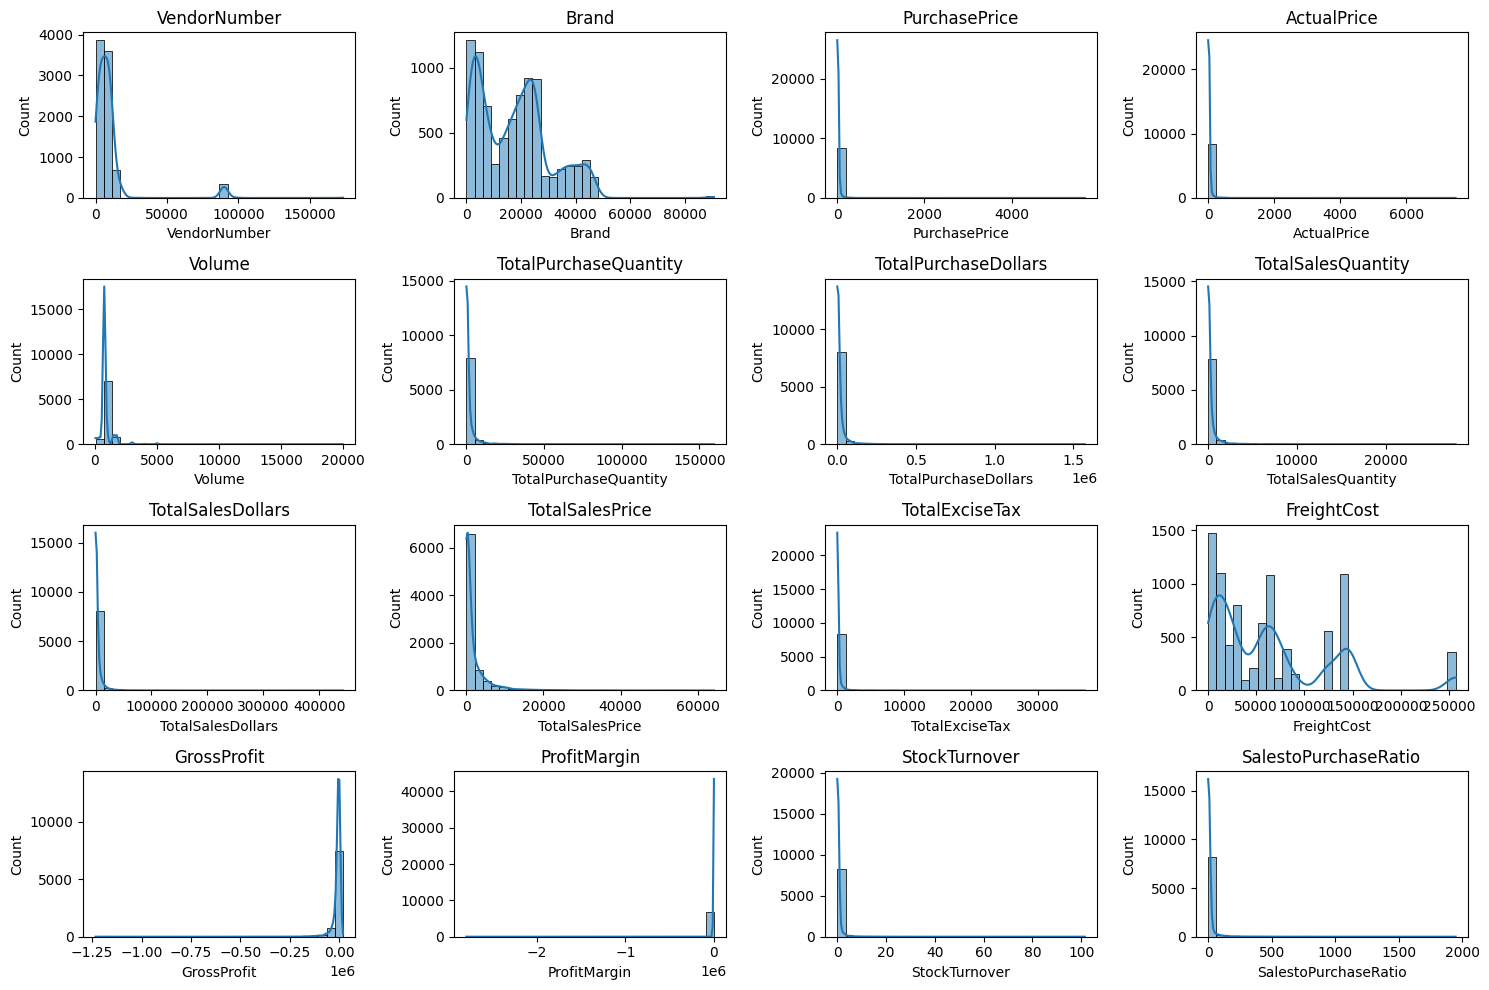

In [95]:
#Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

#Plotting Histogram
plt.figure(figsize= (15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #Adjust grid-layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

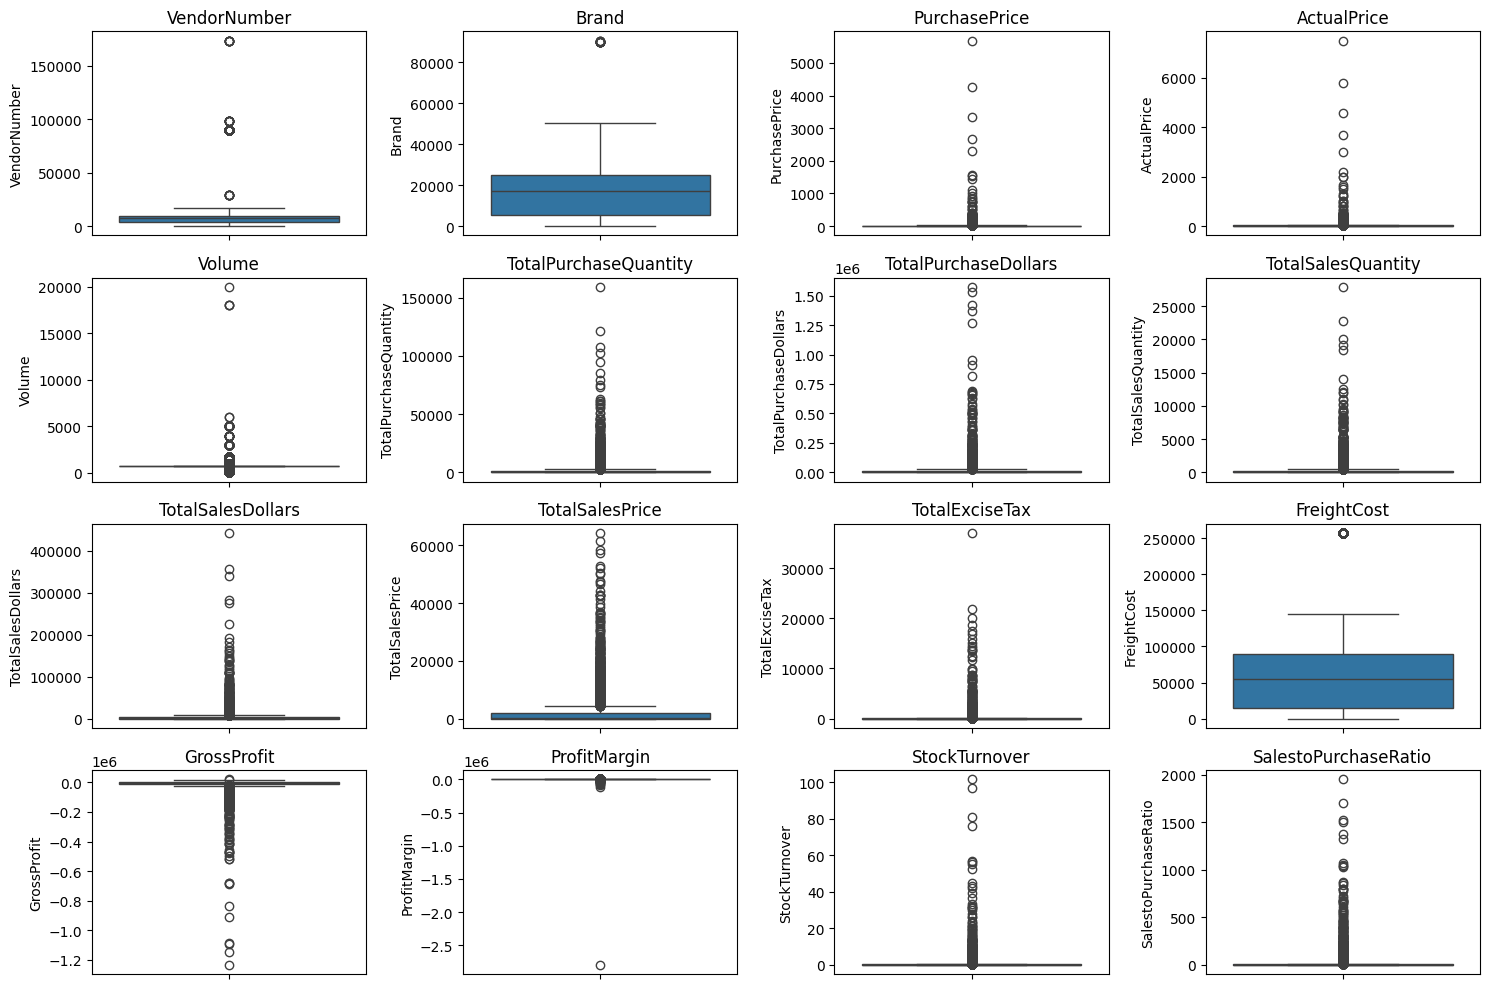

In [96]:
#Outlier deterction with Boxplot
plt.figure(figsize= (15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# **# Summary Statistics Insights:**

•	**Negative & Zero Values:**

    o   Gross Profit drops to **-1.25M**, indicating losses from high costs or heavy discounting.

    o	Profit Margin reaches **-∞**, suggesting revenue is zero or below cost.

    o	Sales Quantity & Sales Dollars show 0 values, highlighting unsold or obsolete stock.

•	**High Outliers:**

    o	Purchase & Actual Prices: **Max values (5,681 & 7,499)** far exceed means **(~24 & ~35)**, pointing to premium-priced items.

    o	**Freight Cost:** Wide range (0.09 to 257K) suggests bulk shipments or logistics inefficiencies.

    o	**Stock Turnover:** From 0 to ~100, showing fast-selling vs stagnant items; values >1 indicate rapid sales.

    o	**Sales-to-Purchase Ratio:** Peaks near 1,900, showing excess sales over purchases due to backlog or clearance.

•	**Distribution Patterns:**

    o	Most metrics are right-skewed, driven by a few high-value outliers.

    o	Quantities and volumes cluster near zero, indicating low sales frequency or slow-moving inventory.



In [97]:
#filtering out the data by removing inconsistencies
df = pd.read_sql_query(""" SELECT * 
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0
""", conn)

In [98]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1392,CONSTELLATION BRANDS INC,6650,Simi Chard,7.38,14.99,750.0,10699,78958.62,8355.0,92197.45,13345.05,938.21,79528.99,13238.83,14.359215,0.780914,8.617389
1,1392,CONSTELLATION BRANDS INC,22143,Simi Cab Svgn,10.52,18.99,750.0,3896,40985.92,2847.0,45883.53,13495.69,318.73,79528.99,4897.61,10.674004,0.730749,11.777087
2,516,BANFI PRODUCTS CORP,18152,Banfi Centine Mntcln Tscna,5.26,10.99,750.0,5377,28283.02,3809.0,31072.91,7461.86,426.94,8510.41,2789.89,8.978528,0.708388,5.778856
3,1392,CONSTELLATION BRANDS INC,22899,Simi Svgn Bl,6.53,14.99,750.0,4326,28248.78,2917.0,29491.83,7988.13,327.01,79528.99,1243.05,4.214896,0.674295,6.817344
4,8673,STE MICHELLE WINE ESTATES,16819,H3 Horse Heaven Hills Cab Sv,8.21,11.99,750.0,3034,24909.14,2183.0,26183.17,5512.41,244.86,15919.70,1274.03,4.865836,0.719512,8.629918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,90024,VINILANDIA USA,46135,Aresti Pnt Nr Curico Vly,3.28,10.99,750.0,1,3.28,15.0,74.85,39.92,1.68,2802.64,71.57,95.617902,15.000000,74.850000
987,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,3.0,5.97,5.97,0.33,27100.41,3.33,55.778894,1.500000,2.985000
988,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,62.72,0.98,6.72,50293.62,60.38,96.269133,21.333333,10.453333
989,9815,WINE GROUP INC,22407,Three Wishes Chard,2.25,3.29,750.0,1,2.25,1.0,3.29,3.29,0.11,27100.41,1.04,31.610942,1.000000,3.290000


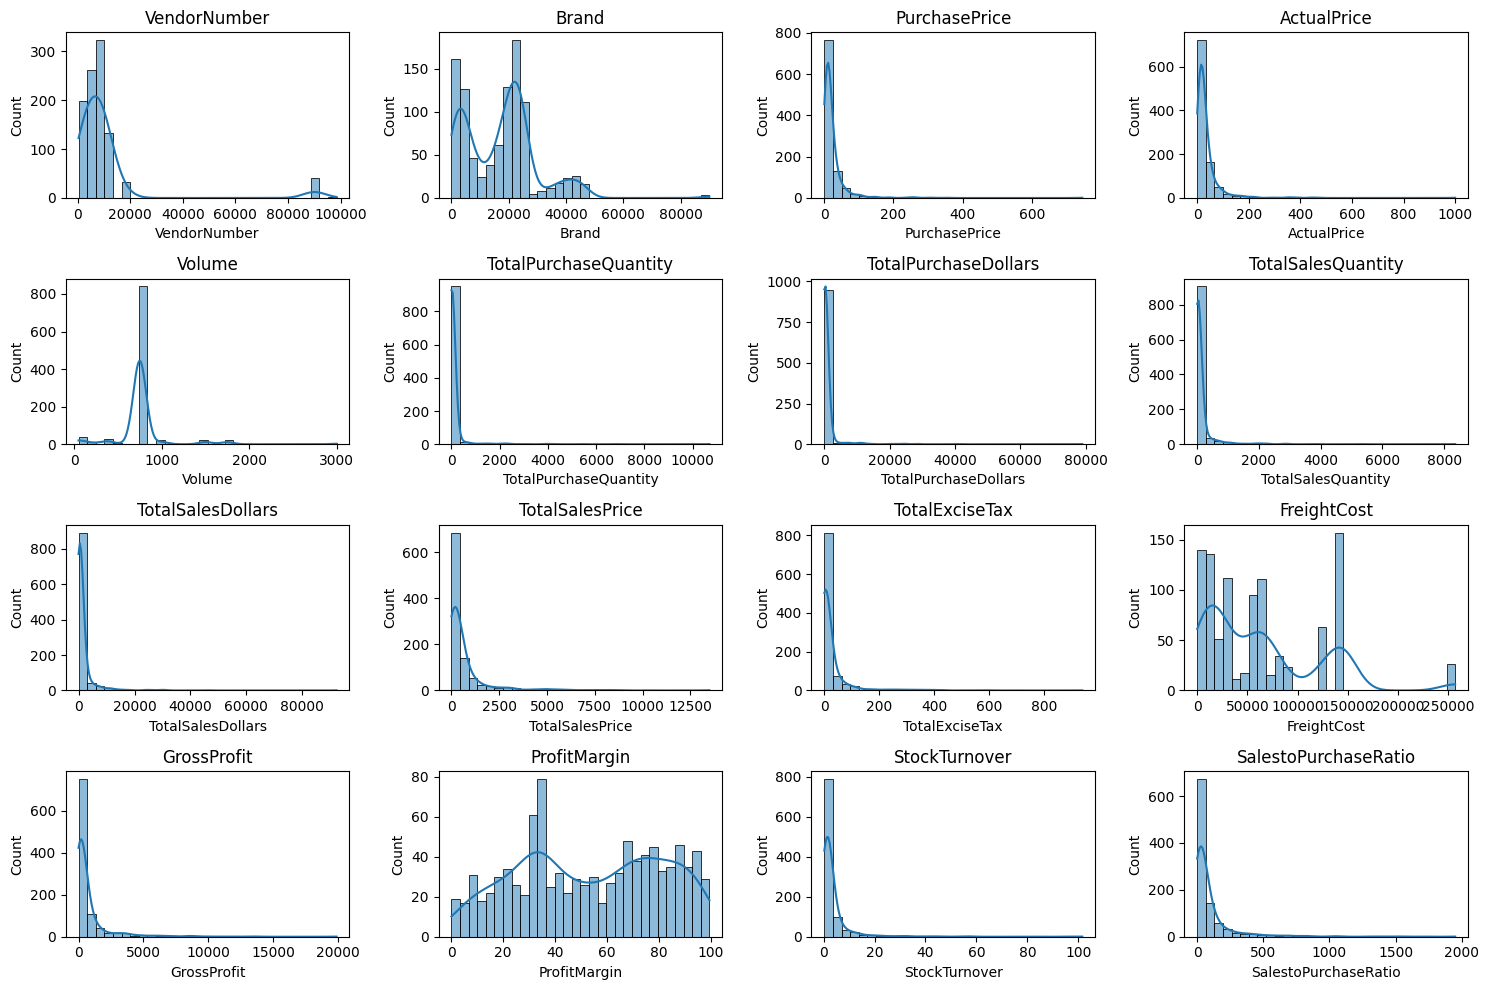

In [99]:
#Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

#Plotting Histogram
plt.figure(figsize= (15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #Adjust grid-layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

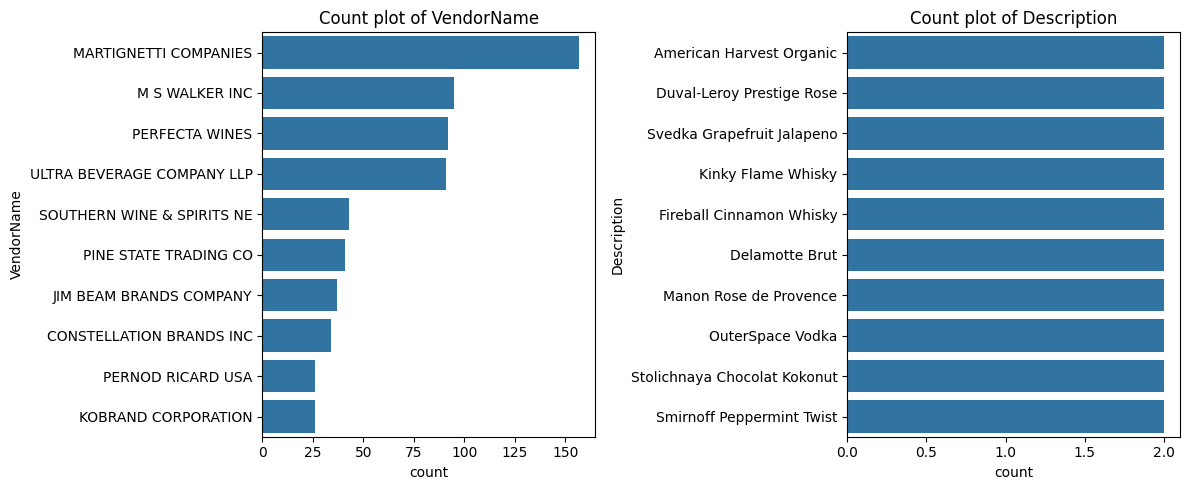

In [100]:
#COunt Plots for Categorical colums
categorical_cols = ['VendorName', 'Description']

plt.figure(figsize= (12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])   # Top 10 Caterogies
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

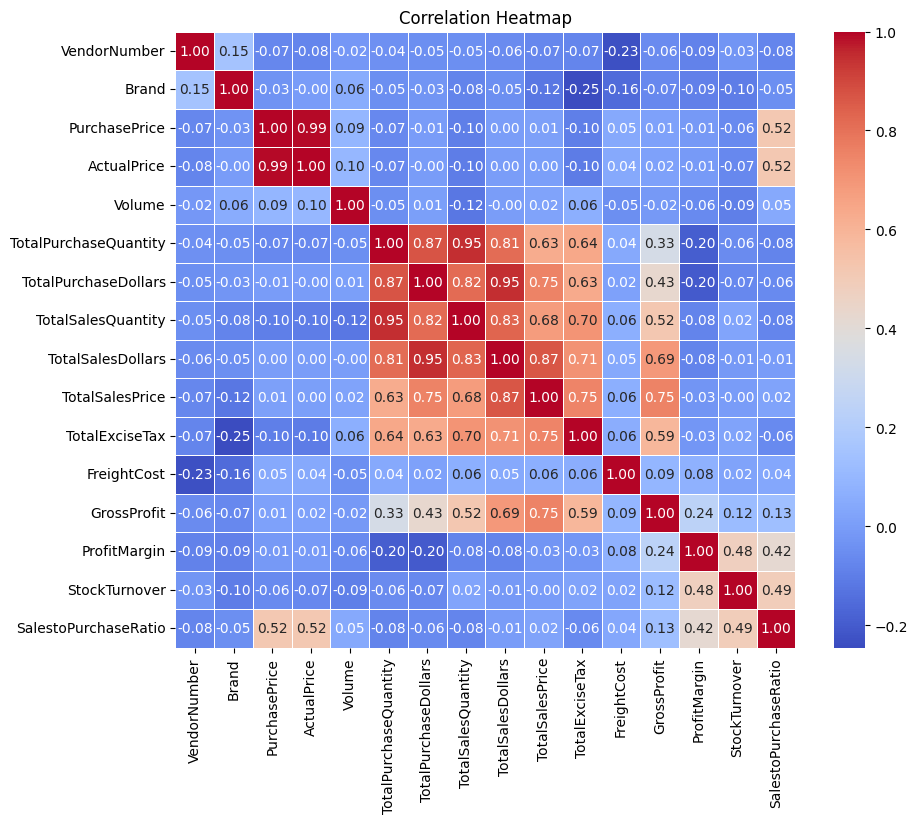

In [101]:
#Correlation Heatmap
plt.figure(figsize= (10,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt= ".2f", cmap= 'coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# **# Correlation Insight:**

•	**Purchase Price vs. Total Sales Dollars & Gross Profit:**

        Weak correlation (−0.012 and −0.016), indicating that price variations do not significantly impact sales revenue or profit.

•	**Total Purchase Quantity vs. Total Sales Quantity:**

        Strong correlation (0.999), confirming efficient inventory turnover.

•	**Profit Margin vs. Total Sales Price:**

        Negative correlation (−0.179), suggesting increasing sales prices may lead to reduced margins, possibly due to competitive pricing pressures.

•	**Stock Turnover vs. Gross Profit & Profit Margin:**

        Weak negative correlation (−0.038 & −0.055), indicating that faster stock turnover does not necessarily equate to higher profitability


# **Data Analysis**
**Q1.** Identify Brands that needs Promotional or Pricing Adjustments which exhibits lower sales performance but Higher Profit Margins

In [102]:
brand_performance= df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [103]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)


In [104]:
low_sales_threshold


np.float64(119.856)

In [105]:
high_margin_threshold

np.float64(86.57313090540222)

In [106]:
#Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)  
]

print("Brands with LOW Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with LOW Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
924,Tracia Syrah,44.94,88.495772
66,Bacardi Oakheart Spiced Trav,59.94,87.554221
275,Chicken & Turkey Cotes du Rh,59.94,90.990991
845,St Elder Elderflower Liqueur,60.39,90.594469
351,Dr McGillicuddy's Apple Pie,62.72,96.269133
47,Aresti Pnt Nr Curico Vly,74.85,95.617902
326,DeKuyper Buttershots Trav,76.93,90.718835
908,Three Olives Grape Vodka,80.19,99.114603
846,St Germain Liqueur,89.94,87.658439
706,Piehole Apple Pie,98.01,95.592287


In [107]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<1000] #For better Visualisation

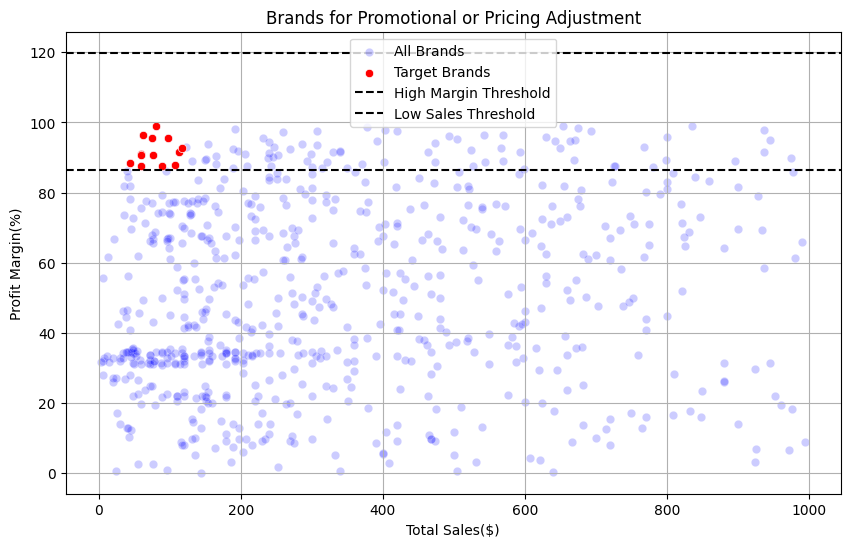

In [108]:
plt.figure(figsize = (10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue', label='All Brands', alpha= 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label='Target Brands')

plt.axhline(high_margin_threshold, linestyle='--', color='black', label= 'High Margin Threshold')
plt.axhline(low_sales_threshold, linestyle='--', color='black', label= 'Low Sales Threshold')

plt.xlabel("Total Sales($)")
plt.ylabel("Profit Margin(%)")
plt.title("Brands for Promotional or Pricing Adjustment")
plt.legend()
plt.grid(True)
plt.show()

**Q2. Which Vendors and brands demonstrate the highest sales performance?**

In [138]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/ 1_000:.2f}K"
    else:
        return str(value)

In [139]:
#Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
MARTIGNETTI COMPANIES         284941.75
CONSTELLATION BRANDS INC      208161.22
ULTRA BEVERAGE COMPANY LLP    146511.81
M S WALKER INC                120432.33
PERFECTA WINES                113193.99
BACARDI USA INC                62473.88
BROWN-FORMAN CORP              46533.26
DIAGEO NORTH AMERICA INC       41498.32
SOUTHERN WINE & SPIRITS NE     40347.06
JIM BEAM BRANDS COMPANY        40147.43
Name: TotalSalesDollars, dtype: float64

In [140]:
top_brands.apply(lambda x : format_dollars(x))

Description
Simi Chard                      92.20K
Simi Cab Svgn                   45.88K
Rodney Strong Cab Svgn          31.25K
Banfi Centine Mntcln Tscna      31.07K
Ch La Rousseliere St Estephe    29.70K
Simi Svgn Bl                    29.49K
Buehler Chard RRV               27.40K
H3 Horse Heaven Hills Cab Sv    26.18K
Madison's Ranch Cab Svgn        24.80K
Silverado Cab Svgn Napa         24.07K
Name: TotalSalesDollars, dtype: object

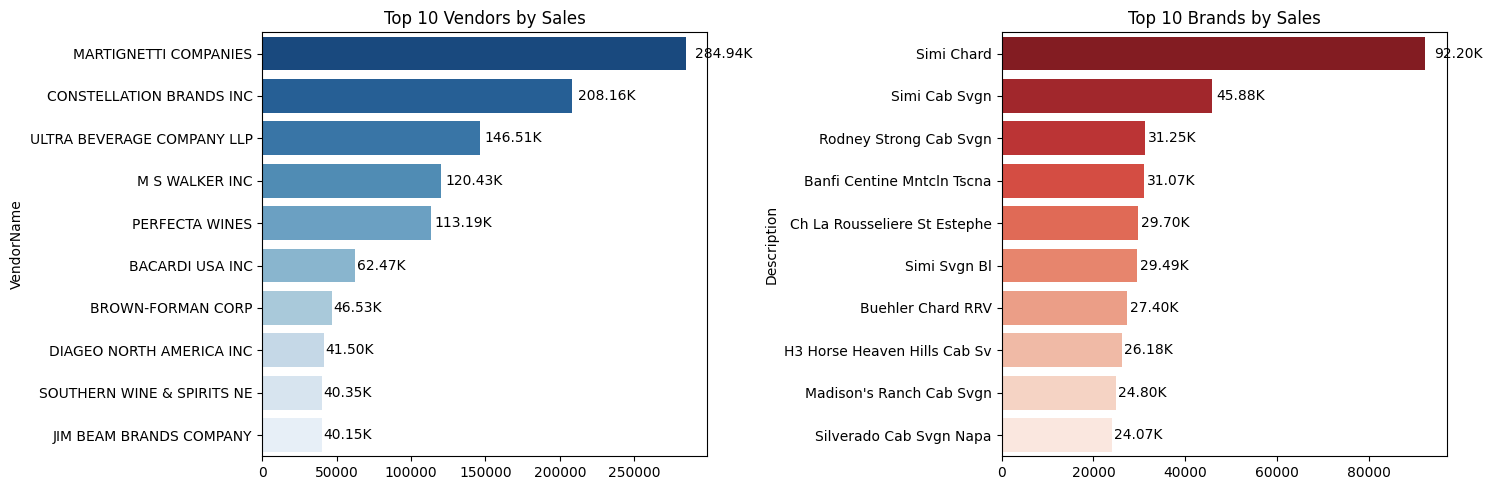

In [141]:
plt.figure(figsize = (15,5))

#Plot for Top Vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette= "Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width()*0.02),
    bar.get_y() + bar.get_height() / 2,
    format_dollars(bar.get_width()),
    ha='left', va='center', fontsize=10, color='black')

#Plot for Top Brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette= "Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()*0.02),
    bar.get_y() + bar.get_height() / 2,
    format_dollars(bar.get_width()),
    ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


**Q3. Which vendors contribute thw most to total purchase dollars?**

In [142]:
vendor_performance= df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    "GrossProfit" : 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()

In [143]:
vendor_performance['PurchaseContribution']=  vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [144]:
vendor_performance


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution
0,ALISA CARR BEVERAGES,2409.40,2871.96,5281.36,0.284994
1,ATLANTIC IMPORTING COMPANY,620.40,129.35,749.75,0.073383
2,BACARDI USA INC,29103.52,33370.36,62473.88,3.442484
3,BANFI PRODUCTS CORP,31897.97,4869.15,36767.12,3.773023
4,BROWN-FORMAN CORP,9363.71,37169.55,46533.26,1.107578
...,...,...,...,...,...
67,VRANKEN AMERICA,315.76,344.13,659.89,0.037349
68,WEIN BAUER INC,36.56,5.38,41.94,0.004324
69,WESTERN SPIRITS BEVERAGE CO,7466.94,1432.26,8899.20,0.883220
70,WILLIAM GRANT & SONS INC,2409.44,3007.18,5416.62,0.284998


In [145]:
vendor_performance.sort_values('PurchaseContribution', ascending =False)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution
9,CONSTELLATION BRANDS INC,173421.58,34739.64,208161.22,20.513020
33,MARTIGNETTI COMPANIES,133259.75,151682.00,284941.75,15.762513
42,PERFECTA WINES,64312.58,48881.41,113193.99,7.607157
63,ULTRA BEVERAGE COMPANY LLP,55346.98,91164.83,146511.81,6.546669
31,M S WALKER INC,49520.29,70912.04,120432.33,5.857464
...,...,...,...,...,...
32,MARSALLE COMPANY,78.78,1378.41,1457.19,0.009318
20,FANTASY FINE WINES CORP,64.32,15.58,79.90,0.007608
6,CAPSTONE INTERNATIONAL,54.64,173.24,227.88,0.006463
68,WEIN BAUER INC,36.56,5.38,41.94,0.004324


In [146]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution', ascending = False))

In [147]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution
9,CONSTELLATION BRANDS INC,173.42K,34.74K,208.16K,21.0
33,MARTIGNETTI COMPANIES,133.26K,151.68K,284.94K,16.0
42,PERFECTA WINES,64.31K,48.88K,113.19K,8.0
63,ULTRA BEVERAGE COMPANY LLP,55.35K,91.17K,146.51K,7.0
31,M S WALKER INC,49.52K,70.91K,120.43K,6.0
3,BANFI PRODUCTS CORP,31.90K,4.87K,36.77K,4.0
45,PINE STATE TRADING CO,31.32K,8.64K,39.96K,4.0
2,BACARDI USA INC,29.10K,33.37K,62.47K,3.0
56,STE MICHELLE WINE ESTATES,28.27K,7.92K,36.19K,3.0
71,WINE GROUP INC,26.95K,5.03K,31.99K,3.0


In [148]:
top_vendors['PurchaseContribution'].sum()

np.float64(75.0)

In [149]:
top_vendors['Cumulative_Contribution'] = top_vendors['PurchaseContribution'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution,Cumulative_Contribution
9,CONSTELLATION BRANDS INC,173.42K,34.74K,208.16K,21.0,21.0
33,MARTIGNETTI COMPANIES,133.26K,151.68K,284.94K,16.0,37.0
42,PERFECTA WINES,64.31K,48.88K,113.19K,8.0,45.0
63,ULTRA BEVERAGE COMPANY LLP,55.35K,91.17K,146.51K,7.0,52.0
31,M S WALKER INC,49.52K,70.91K,120.43K,6.0,58.0
3,BANFI PRODUCTS CORP,31.90K,4.87K,36.77K,4.0,62.0
45,PINE STATE TRADING CO,31.32K,8.64K,39.96K,4.0,66.0
2,BACARDI USA INC,29.10K,33.37K,62.47K,3.0,69.0
56,STE MICHELLE WINE ESTATES,28.27K,7.92K,36.19K,3.0,72.0
71,WINE GROUP INC,26.95K,5.03K,31.99K,3.0,75.0


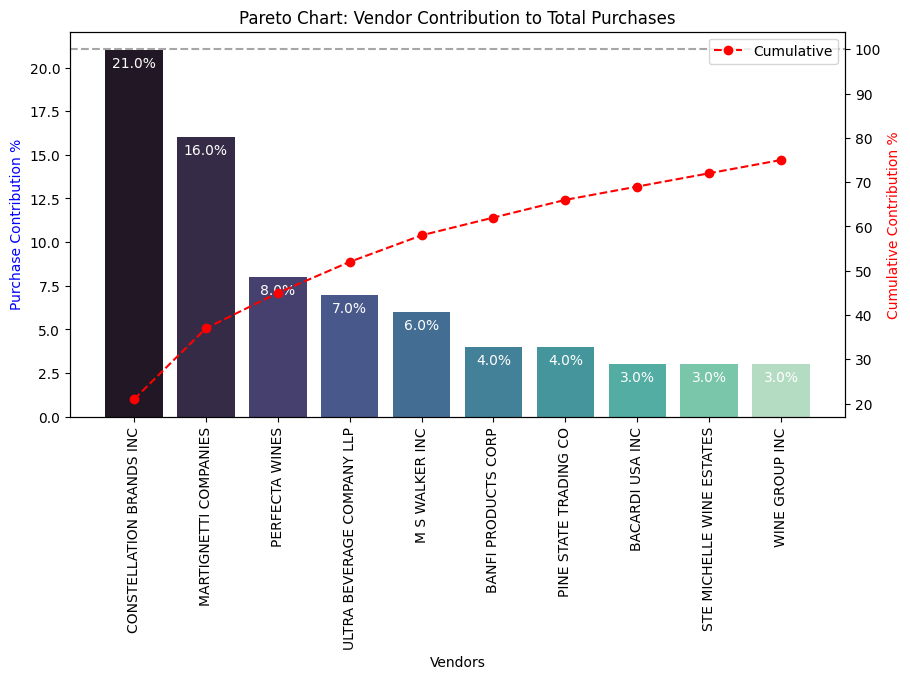

In [150]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot for Purchase Contribution
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution'], color='red', marker='o', linestyle='dashed', label='Cumulative')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


**Q4. How much of total procurment is dependent on the top vendors?**

In [151]:
print(f"Total Purchase Contribution of Top 10 vendors is {round(top_vendors['PurchaseContribution'].sum())}")

Total Purchase Contribution of Top 10 vendors is 75


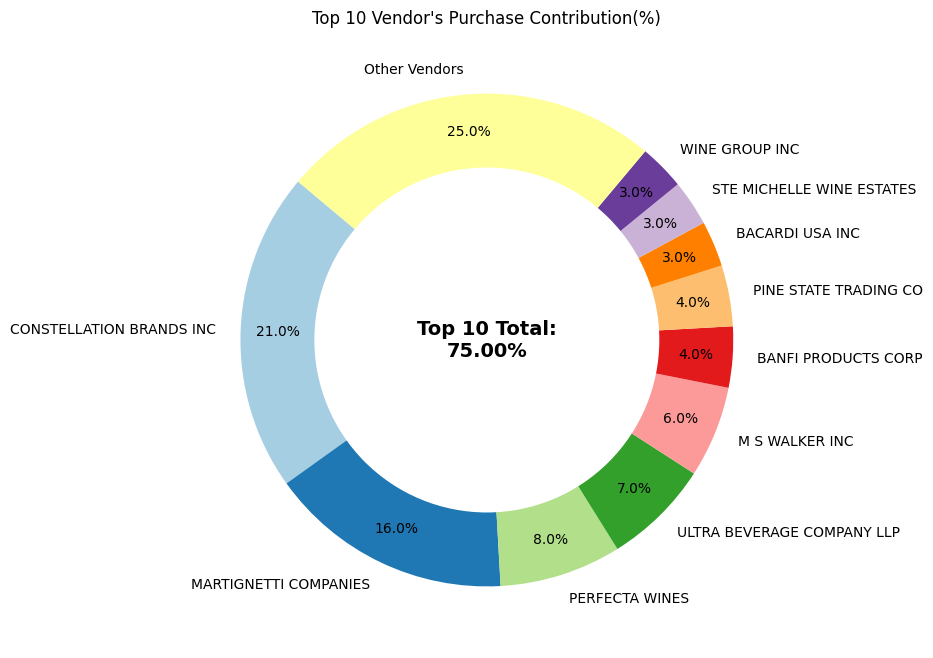

In [152]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution(%)")
plt.show()


**Q5. Does purchasing in bulk reduce the unit price, and what is the optimal purhcase colume for cost savings?**

In [153]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [154]:
df


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1392,CONSTELLATION BRANDS INC,6650,Simi Chard,7.38,14.99,750.0,10699,78958.62,8355.0,...,13345.05,938.21,79528.99,13238.83,14.359215,0.780914,8.617389,7.38,Large,17298.72
1,1392,CONSTELLATION BRANDS INC,22143,Simi Cab Svgn,10.52,18.99,750.0,3896,40985.92,2847.0,...,13495.69,318.73,79528.99,4897.61,10.674004,0.730749,11.777087,10.52,Large,11035.48
2,516,BANFI PRODUCTS CORP,18152,Banfi Centine Mntcln Tscna,5.26,10.99,750.0,5377,28283.02,3809.0,...,7461.86,426.94,8510.41,2789.89,8.978528,0.708388,5.778856,5.26,Large,8247.68
3,1392,CONSTELLATION BRANDS INC,22899,Simi Svgn Bl,6.53,14.99,750.0,4326,28248.78,2917.0,...,7988.13,327.01,79528.99,1243.05,4.214896,0.674295,6.817344,6.53,Large,9200.77
4,8673,STE MICHELLE WINE ESTATES,16819,H3 Horse Heaven Hills Cab Sv,8.21,11.99,750.0,3034,24909.14,2183.0,...,5512.41,244.86,15919.70,1274.03,4.865836,0.719512,8.629918,8.21,Large,6986.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,90024,VINILANDIA USA,46135,Aresti Pnt Nr Curico Vly,3.28,10.99,750.0,1,3.28,15.0,...,39.92,1.68,2802.64,71.57,95.617902,15.000000,74.850000,3.28,Small,-45.92
987,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,3.0,...,5.97,0.33,27100.41,3.33,55.778894,1.500000,2.985000,1.32,Small,-1.32
988,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,...,0.98,6.72,50293.62,60.38,96.269133,21.333333,10.453333,0.39,Small,-47.58
989,9815,WINE GROUP INC,22407,Three Wishes Chard,2.25,3.29,750.0,1,2.25,1.0,...,3.29,0.11,27100.41,1.04,31.610942,1.000000,3.290000,2.25,Small,0.00


In [155]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'],q=3, labels=['Small','Medium','Large'])

In [156]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,36.175954
Medium,20.555619
Large,11.235182


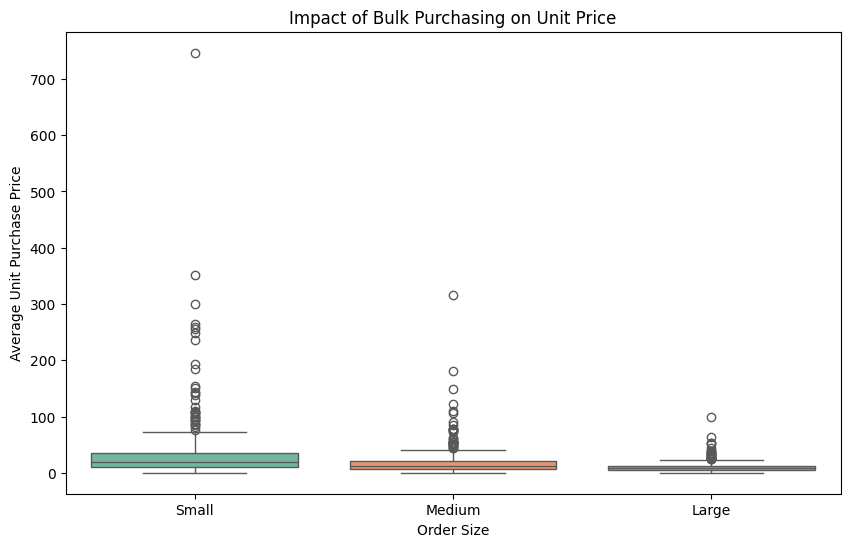

In [157]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()


# **Insights:**

•	Vendors placing Large Orders achieve the lowest unit price, enabling higher margins if inventory is managed well.

•	There is a significant price gap **(~70% reduction)** between Small and Large orders, showing strong cost benefits of bulk 
      purchases.

•	This confirms that bulk pricing strategies effectively incentivize larger purchases, boosting overall sales despite reduced
     per-unit prices.


**Q6. Which vendors have low inventory turnover, indicating excess stock and slow-moving products?**

In [158]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending =True).head(10)

,StockTurnover
VendorName,
PALM BAY INTERNATIONAL INC,0.666667
WILLIAM GRANT & SONS INC,0.695652
STE MICHELLE WINE ESTATES,0.704484
TREASURY WINE ESTATES,0.705882
PINE STATE TRADING CO,0.708564
WINE GROUP INC,0.721168
CONSTELLATION BRANDS INC,0.727265
Russian Standard Vodka,0.730769
R.P.IMPORTS INC,0.733333


**Q7. How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?**

In [159]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print("Total Unsold Capital", format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital -227977.13


In [160]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)


,VendorName,UnsoldInventoryValue
9,CONSTELLATION BRANDS INC,35.53K
3,BANFI PRODUCTS CORP,8.40K
45,PINE STATE TRADING CO,7.29K
62,TRINCHERO FAMILY ESTATES,6.06K
71,WINE GROUP INC,5.79K
56,STE MICHELLE WINE ESTATES,4.03K
69,WESTERN SPIRITS BEVERAGE CO,1.16K
23,FREDERICK WILDMAN & SONS,994.2299999999999
53,SIDNEY FRANK IMPORTING CO,561.55
37,MOET HENNESSY USA INC,360.80000000000007


**Q8. Which is the 95% confidence intervals for profit margins of top-performing and low-performing vendors?**

In [161]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [162]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [163]:
print(top_vendors)
print(low_vendors)

0      14.359215
1      10.674004
2       8.978528
3       4.214896
4       4.865836
         ...    
796    98.319620
825    96.849174
827    97.877620
927    98.763142
934    98.766655
Name: ProfitMargin, Length: 248, dtype: float64
507     7.320644
515    14.980228
528     0.167224
533    21.864576
535    22.437180
         ...    
986    95.617902
987    55.778894
988    96.269133
989    31.610942
990    99.114603
Name: ProfitMargin, Length: 251, dtype: float64


In [164]:
#calculating confidence interval

def confidence_interval(data, confidence= 0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1 )/ np.sqrt(len(data))    #standard error
    t_critical = stats.t.ppf((1+confidence)/2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val- margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (55.51, 62.72), Mean: 59.12
Low Vendors 95% CI: (43.85, 50.03), Mean: 46.94


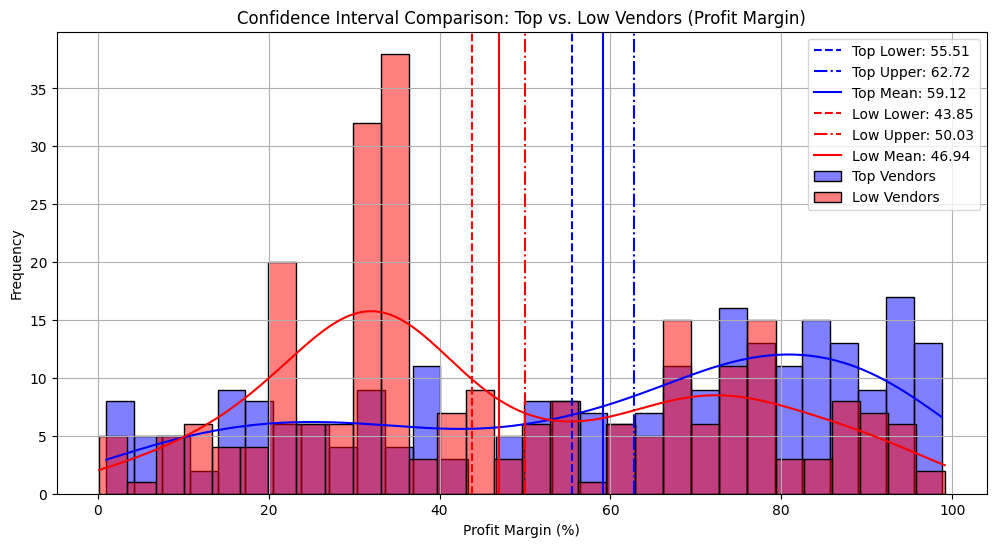

In [165]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="-.", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="-.", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


**# Insights:**

•	Low-Performing Vendors maintain higher margins but struggles with sales volume, indicating potential pricing inefficacies or market reach issue.

•	Actionable Insights:

    o	Top- Performing Vendors: Optimize profitability by adjusting pricing, reducing operational costs, or offering bundled promotion.

    o	Low-Performing Vendors: Improve marketing efforts, optimize prizing strategies, and enhance distribution networks.


# **HYPOTHESIS & CONFIDENCE INTERVAL**

 **HYPOTHESIS Testing:**

**H₀ (Null Hypothesis):** No significant difference in profit margins between top and low-performing vendors.

**H₁ (Alternative Hypothesis):** A significant difference exists in profit margins between the two vendor groups.

**Result:** The null hypothesis is rejected, confirming that the two groups operate under distinctly different profitability models.

**Implication:** High-margin vendors may benefit from better pricing strategies, while top-selling vendors could focus on cost efficiency.


In [167]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low–performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")


T-Statistic: 5.0538, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low–performing vendors.


# **## POWER- BI Dashboard Snippet**

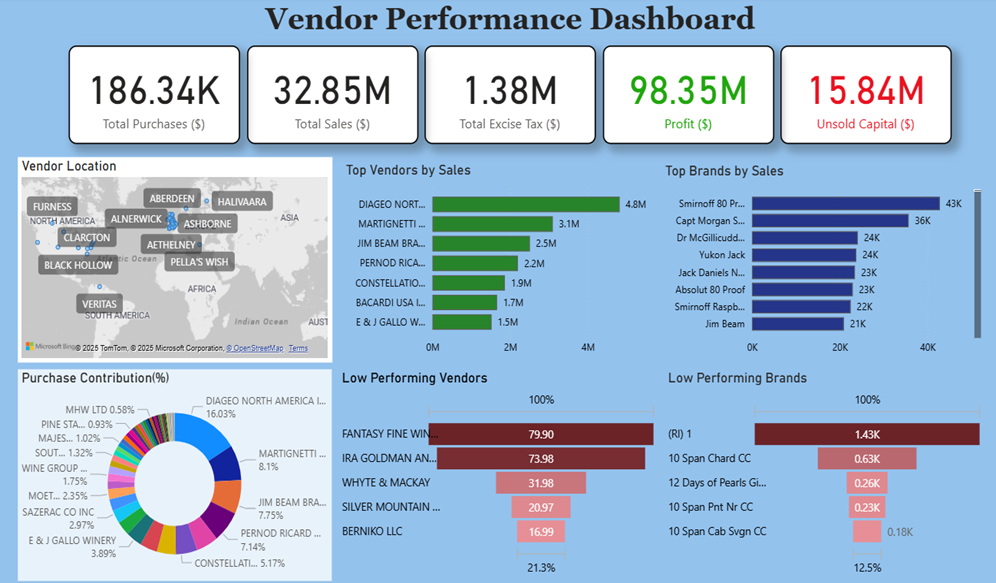

# **Final Recommendations:**

•	Re-evaluate pricing for low-sales, high-margin brands to boost sales without sacrificing profitability.

•	Diversify vendor- partnership to reduce dependency on a few suppliers and mitigate supply chain risks.

•	Leverage bulk purchasing advantages to maintain competitive pricing optimizing inventory management.

•	Optimize slow- moving inventory by adjusting purchase quantities, launching clearance sales, revising storage strategies.

•	 Enhance marketing and distributing strategies for low- performing vendors to drive higher sales volume without compromising profit margins.

•	By implementing these steps, the company can:

    o	Achieve Higher sustainable profitability.
    o	Mitigate the potential risks.
    o	Enhance overall operational inefficiencies.
